In [34]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import r2_score


import seaborn as sns
sns.set(style = 'ticks')

In [35]:
path='C:/Users/Jewin/Desktop/Jovita-DataSciene/DATA/cost-of-living-2018.csv'

data=pd.read_csv(path)

In [36]:
data.head(10)

,Rank,City,Rent Index,Cost of Living Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,NaN,"Hamilton, Bermuda",110.87,128.76,143.47,158.75,112.26
1,NaN,"Zurich, Switzerland",66.14,105.03,149.86,135.76,142.70
2,NaN,"Geneva, Switzerland",71.70,104.38,138.98,129.74,130.96
3,NaN,"Basel, Switzerland",49.68,91.61,127.54,127.22,139.01
4,NaN,"Bern, Switzerland",43.57,87.30,132.70,119.48,112.71
5,NaN,"Lausanne, Switzerland",52.32,91.24,126.59,132.12,127.95
6,NaN,"Reykjavik, Iceland",57.25,91.70,118.15,133.19,88.95
7,NaN,"Stavanger, Norway",39.83,80.61,106.09,143.54,118.14
8,NaN,"Lugano, Switzerland",52.91,86.73,117.74,122.30,119.86
9,NaN,"Oslo, Norway",49.28,84.46,112.42,124.09,102.94


In [37]:
data.shape

(540, 7)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 7 columns):
Rank                            0 non-null float64
City                            540 non-null object
Rent Index                      540 non-null float64
Cost of Living Index            540 non-null float64
Groceries Index                 540 non-null float64
Restaurant Price Index          540 non-null float64
Local Purchasing Power Index    540 non-null float64
dtypes: float64(6), object(1)
memory usage: 29.7+ KB


In [39]:
data.isnull().sum()

Rank                            540
City                              0
Rent Index                        0
Cost of Living Index              0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

In [40]:
#Dropping the columns Rank because it has all null values, and city which is categorical and not really useful for the analysis.
data=data.drop(columns=['Rank','City'])

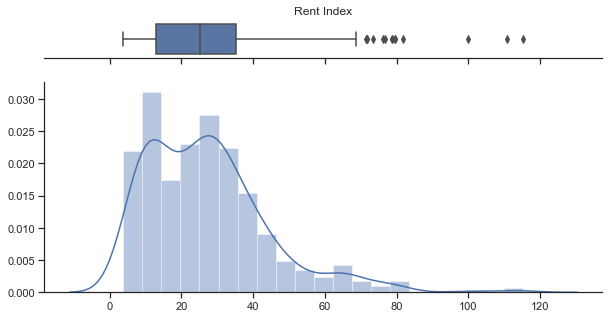

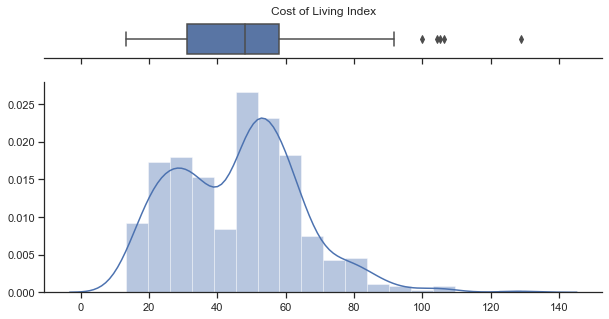

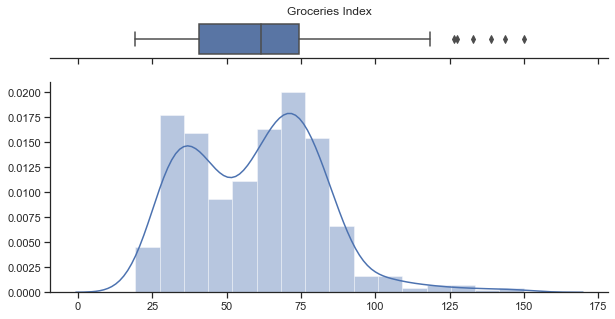

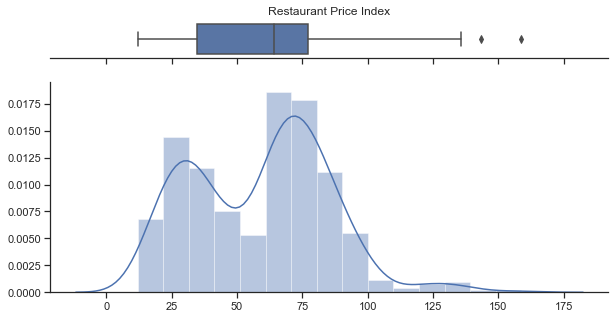

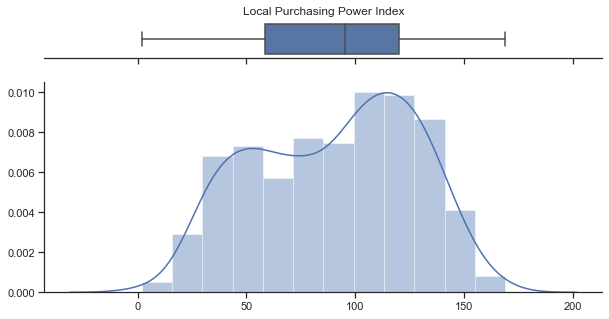

In [41]:
for c in data.columns:
    fig, ax = plt.subplots(2, 
                           figsize = (10, 5),
                           sharex = True, 
                           gridspec_kw = {'height_ratios': (0.15, 0.85)})

    ax_box = ax[0]
    ax_box = sns.boxplot(data[c], ax = ax_box)
    ax_box.set(title = c, yticks = [], xlabel = '')
    sns.despine(ax = ax_box, left = True)

    ax_hist = ax[1]
    ax_hist = sns.distplot(data[c], ax = ax_hist)
    ax_hist.set(xlabel = '')
    sns.despine(ax = ax_hist)

plt.show()

In [42]:
# getting to know the correlation between each variable
data.corr()

,Rent Index,Cost of Living Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
Rent Index,1.000000,0.928384,0.778893,0.758411,0.568749
Cost of Living Index,0.928384,1.000000,0.924514,0.915006,0.641057
Groceries Index,0.778893,0.924514,1.000000,0.845905,0.635767
Restaurant Price Index,0.758411,0.915006,0.845905,1.000000,0.652148
Local Purchasing Power Index,0.568749,0.641057,0.635767,0.652148,1.000000


(6.0, 0)

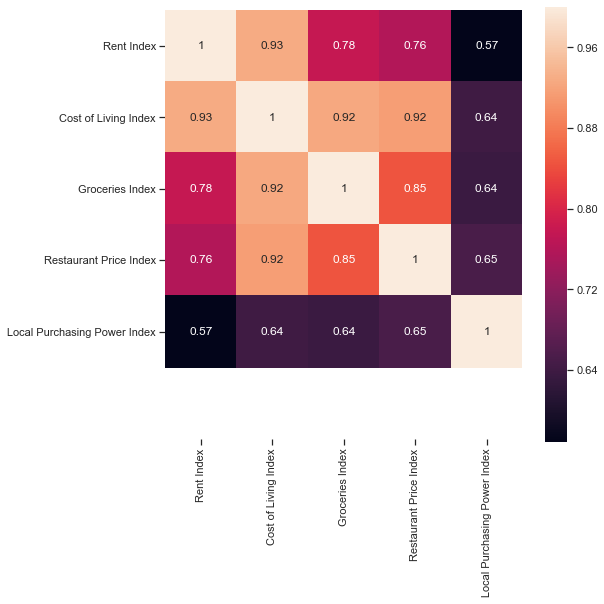

In [43]:
# Plotting the heat map to get the pictorial representation of the degree of correlation.
plt.figure(figsize=(8,8))
ax=sns.heatmap(data.corr(),annot = True,square = True)
ax.set_ylim(6.0, 0)

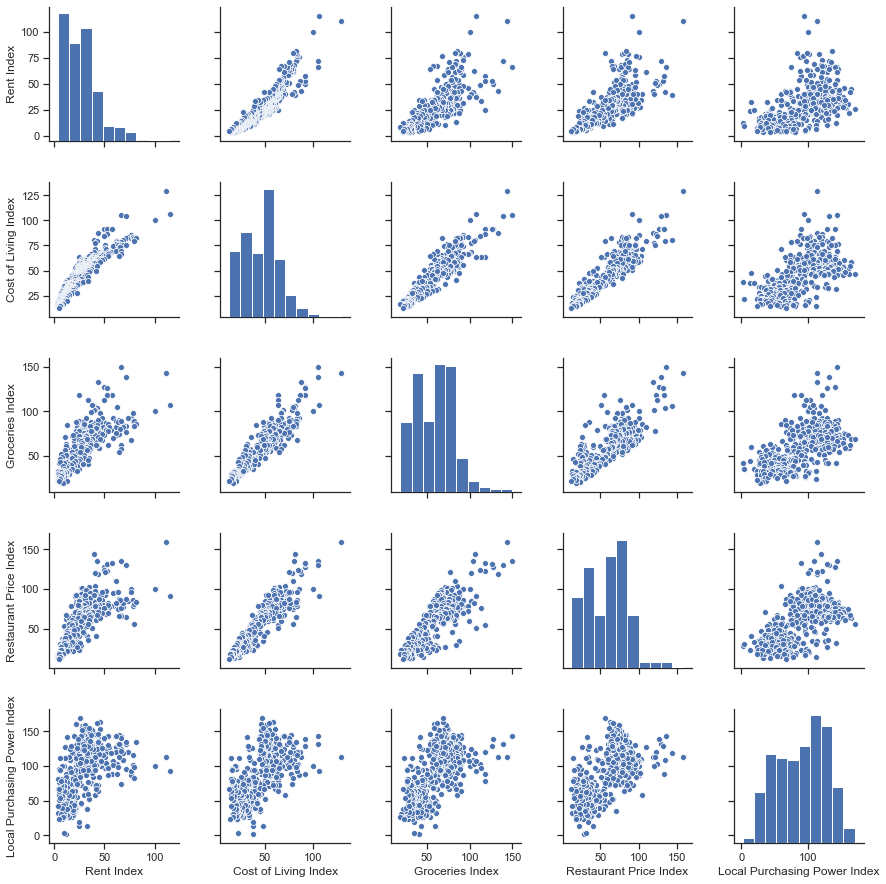

In [44]:
#Representing data in pair plots to understand the correlation between features
sns.pairplot(data)

In [45]:
data.corr()['Cost of Living Index'].sort_values()

Local Purchasing Power Index    0.641057
Restaurant Price Index          0.915006
Groceries Index                 0.924514
Rent Index                      0.928384
Cost of Living Index            1.000000
Name: Cost of Living Index, dtype: float64

In [46]:
Predictor_columns=['Restaurant Price Index','Groceries Index','Rent Index']
X=data[Predictor_columns]
X.head()

,Restaurant Price Index,Groceries Index,Rent Index
0,158.75,143.47,110.87
1,135.76,149.86,66.14
2,129.74,138.98,71.70
3,127.22,127.54,49.68
4,119.48,132.70,43.57


In [47]:
y=data['Cost of Living Index']
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_eval, y_train, y_eval = train_test_split(X_training, y_training, test_size=0.25, random_state=42)

In [48]:
clf = DecisionTreeRegressor(random_state=0)

In [49]:
clf.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [50]:
print('Training Score: ',clf.score(X_train,y_train))
print('Test Score: ',clf.score(X_eval,y_eval))

Training Score:  1.0
Test Score:  0.9501858463825529


In [51]:
y_train_pred = clf.predict(X_train)

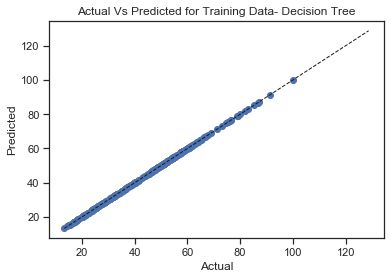

In [52]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_train_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual Vs Predicted for Training Data- Decision Tree')
plt.show()

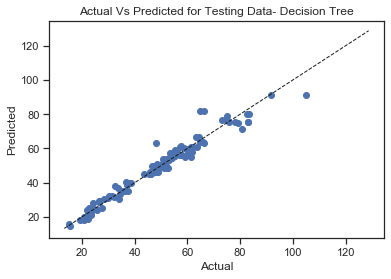

In [53]:
y_eval_predict=clf.predict(X_eval)
fig, ax = plt.subplots()
ax.scatter(y_eval, y_eval_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual Vs Predicted for Testing Data- Decision Tree')
plt.show()

In [54]:
model = RandomForestRegressor()

In [55]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [56]:
print('Training Score: ',model.score(X_train,y_train))
print('Test Score: ',model.score(X_eval,y_eval))

Training Score:  0.9938825213733882
Test Score:  0.9672054875800933


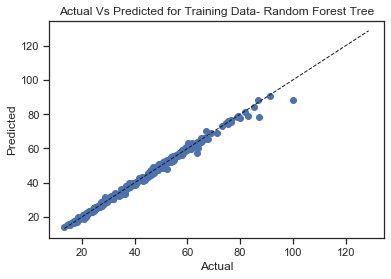

In [57]:
y_train_predict=model.predict(X_train)
fig, ax = plt.subplots()
ax.scatter(y_train, y_train_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual Vs Predicted for Training Data- Random Forest Tree')
plt.show()

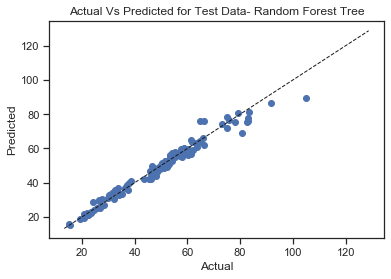

In [58]:
y_eval_predict=model.predict(X_eval)
fig, ax = plt.subplots()
ax.scatter(y_eval, y_eval_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual Vs Predicted for Test Data- Random Forest Tree')
plt.show()

In [59]:
print('Final Decision Score on unseen Data : ',model.score(X_test,y_test))
print('Final Random Forest Score on unseen Data: ',model.score(X_test,y_test))

Final Decision Score on unseen Data :  0.938056829132942
Final Random Forest Score on unseen Data:  0.938056829132942


In [60]:
y_Ran_predict=model.predict(X_test)
print ('R2 for Random Forest:',r2_score(y_test, y_Ran_predict))
y_Dec_predict=clf.predict(X_test)
print ('R2 for Decision Forest:',r2_score(y_test, y_Dec_predict))

R2 for Random Forest: 0.938056829132942
R2 for Decision Forest: 0.9365369649011325
